In [1]:
import os
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt

# Loading the saved model
This is the best performing model from our prvious exercise, where we tested 27 variations of our Convolutional Neural Network.

In [2]:
model = tf.keras.models.load_model("64x3-CNN.model")

# Our "holdout" set
These are some images taken by my phone, so we can be sure they are not on Google images, hence they are not part of the [Microsoft Pet Images Dataset](https://www.microsoft.com/en-us/download/details.aspx?id=54765&WT.mc_id=rss_alldownloads_devresources) that our model is trained and tested on.

In [3]:
DIR = "Data/test/"
for img in os.listdir(DIR):
    print(img)

cat10.jpg
cat3.jpg
cat5.jpg
cat7.jpg
cat8.jpg
cat9.jpg
dog1.jpg
dog2.jpg
dog3.jpg
dog4.jpg


# Image prep.
Making a function to prepare each image for input into our CNN

In [4]:
CATEGORIES = ['Dog', 'Cat']

def prepare(filepath):
    IMG_SIZE = 50
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    # Making all input image sizes same as expected input of our model
    img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
    return img_array

# Predictions

Filename: cat10.jpg 	Prediction: Cat 	Correct!


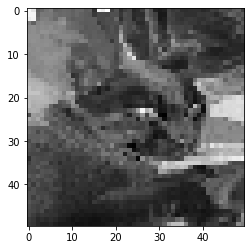

Filename: cat3.jpg 	Prediction: Dog 	Wrong!


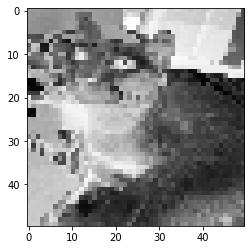

Filename: cat5.jpg 	Prediction: Dog 	Wrong!


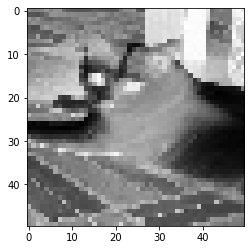

Filename: cat7.jpg 	Prediction: Cat 	Correct!


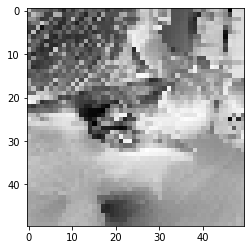

Filename: cat8.jpg 	Prediction: Dog 	Wrong!


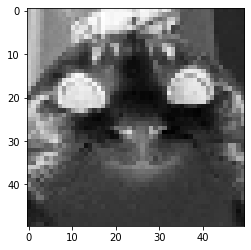

Filename: cat9.jpg 	Prediction: Dog 	Wrong!


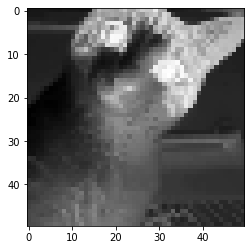

Filename: dog1.jpg 	Prediction: Dog 	Correct!


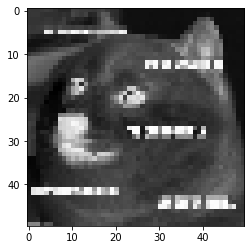

Filename: dog2.jpg 	Prediction: Dog 	Correct!


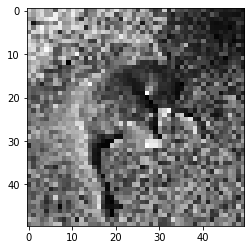

Filename: dog3.jpg 	Prediction: Dog 	Correct!


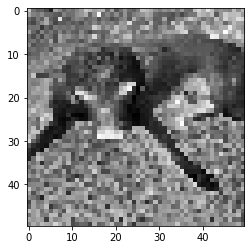

Filename: dog4.jpg 	Prediction: Dog 	Correct!


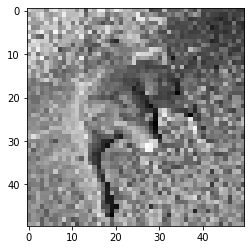

In [5]:
for img in os.listdir(DIR):
    prediction = model.predict(tf.cast(prepare(os.path.join(DIR, img)), tf.float32))
    prediction = CATEGORIES[int(prediction)]
    print("Filename:", img, "\tPrediction:", prediction, "\tCorrect!" if (img[:3]==prediction.lower()) else "\tWrong!")
    plt.imshow(prepare(os.path.join(DIR, img)).reshape(50, 50), cmap=plt.cm.binary)
    plt.show()

##### Observations
Looks like our model is more biased in predicting an image is a dog rather than a cat!